In [229]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder




pd.set_option('display.max_columns', None)

In [2]:
print(os.listdir())

['Untitled.ipynb', 'test.csv', 'data_description.txt', 'train.csv', '.ipynb_checkpoints', 'sample_submission.csv']


In [5]:
df = pd.read_csv("train.csv")

Changes Dirt/Gravel value in PavedDrive to G from N, because N is a null value in other columns such as CentralAir

In [75]:
df["PavedDrive"].value_counts()

PavedDrive
Y    1340
N      90
P      30
Name: count, dtype: int64

In [76]:
df.loc[df['PavedDrive'] == "N", 'PavedDrive'] = "G"

In [77]:
df["PavedDrive"].value_counts()

PavedDrive
Y    1340
G      90
P      30
Name: count, dtype: int64

Recognizes all possible variations of "NA" as an NaN value

In [119]:
missing_value=["N/a",0,"NA","none","no","N",np.nan]
df = pd.read_csv("train.csv", na_values=missing_value)

<Axes: >

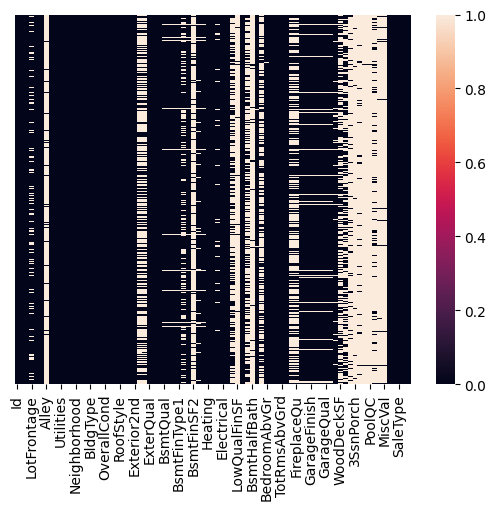

In [47]:
sns.heatmap(df.isnull(), yticklabels=False)

Visual representation of all null values.

In [106]:
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12          60       RL         85.0    11924   Pave   NaN      IR1   
12      13          20       RL          NaN    12968   Pave   NaN      IR2   
13      14          20       RL         91.0    10652   Pave   NaN      IR1   
14      15          20       RL          NaN    10920   Pave   NaN      IR1   
15      16          45       RM         51.0     6120   Pave   NaN      Reg   
16      17          20       RL          NaN    11241   Pave   NaN      IR1   
17      18          90       RL         72.0    10791   Pave   NaN      Reg   
18      19          20       RL         66.0    13695   Pave   NaN      Reg   
19      20          20       RL         70.0     7560   Pave   NaN      Reg   
20      21          60       RL        101.0    14215   Pave   NaN      IR1   
21      22          45       RM         57.0     7449   Pave  Grvl      Reg   
22      23          20       RL         75.0     9742   Pave   NaN      Reg   
23      24         120       RM         44.0     4224   Pave   NaN      Reg   
24      25          20       RL          NaN     8246   Pave   NaN      IR1   
25      26          20       RL        110.0    14230   Pave   NaN      Reg   
26      27          20       RL         60.0     7200   Pave   NaN      Reg   
27      28          20       RL         98.0    11478   Pave   NaN      Reg   
28      29          20       RL         47.0    16321   Pave   NaN      IR1   
29      30          30       RM         60.0     6324   Pave   NaN      IR1   
30      31          70  C (all)         50.0     8500   Pave  Pave      Reg   
31      32          20       RL          NaN     8544   Pave   NaN      IR1   
32      33          20       RL         85.0    11049   Pave   NaN      Reg   
33      34          20       RL         70.0    10552   Pave   NaN      IR1   
34      35         120       RL         60.0     7313   Pave   NaN      Reg   
35      36          60       RL        108.0    13418   Pave   NaN      Reg   
36      37          20       RL        112.0    10859   Pave   NaN      Reg   
37      38          20       RL         74.0     8532   Pave   NaN      Reg   
38      39          20       RL         68.0     7922   Pave   NaN      Reg   
39      40          90       RL         65.0     6040   Pave   NaN      Reg   
40      41          20       RL         84.0     8658   Pave   NaN      Reg   
41      42          20       RL        115.0    16905   Pave   NaN      Reg   
42      43          85       RL          NaN     9180   Pave   NaN      IR1   
43      44          20       RL          NaN     9200   Pave   NaN      IR1   
44      45          20       RL         70.0     7945   Pave   NaN      Reg   
45      46         120       RL         61.0     7658   Pave   NaN      Reg   
46      47          50       RL         48.0    12822   Pave   NaN      IR1   
47      48          20       FV         84.0    11096   Pave   NaN      Reg   
48      49         190       RM         33.0     4456   Pave   NaN      Reg   
49      50          20       RL         66.0     7742   Pa

Change all object datatypes to category datatype for later label encoding

In [142]:
df = df.astype({'MSZoning': 'category', 'Street': 'category', 'Alley': 'category', 'LotShape': 'category', 'LandContour': 'category', 'Utilities': 'category', 'LotConfig': 'category', 'LandSlope': 'category', 'Neighborhood': 'category', 'Condition1': 'category', 'Condition2': 'category', 'BldgType': 'category', 'HouseStyle': 'category', 'RoofStyle': 'category', 'RoofMatl': 'category', 'Exterior1st': 'category', 'Exterior2nd': 'category', 'MasVnrType': 'category', 'ExterQual': 'category', 'ExterCond': 'category', 'Foundation': 'category', 'BsmtQual': 'category', 'BsmtCond': 'category', 'BsmtExposure': 'category', 'BsmtFinType1': 'category', 'BsmtFinType2': 'category', 'Heating': 'category', 'HeatingQC': 'category', 'CentralAir': 'category', 'Electrical': 'category', 'KitchenQual': 'category', 'Functional': 'category', 'FireplaceQu': 'category', 'GarageType': 'category', 'GarageFinish': 'category', 'GarageQual': 'category', 'GarageCond': 'category', 'PavedDrive': 'category', 'PoolQC': 'category', 'Fence': 'category', 'MiscFeature': 'category', 'SaleType': 'category', 'SaleCondition': 'category'})
df.dtypes

Id                  int64
MSSubClass          int64
MSZoning         category
LotFrontage       float64
LotArea             int64
Street           category
Alley            category
LotShape         category
LandContour      category
Utilities        category
LotConfig        category
LandSlope        category
Neighborhood     category
Condition1       category
Condition2       category
BldgType         category
HouseStyle       category
OverallQual         int64
OverallCond         int64
YearBuilt           int64
YearRemodAdd        int64
RoofStyle        category
RoofMatl         category
Exterior1st      category
Exterior2nd      category
MasVnrType       category
MasVnrArea        float64
ExterQual        category
ExterCond        category
Foundation       category
BsmtQual         category
BsmtCond         category
BsmtExposure     category
BsmtFinType1     category
BsmtFinSF1        float64
BsmtFinType2     category
BsmtFinSF2        float64
BsmtUnfSF         float64
TotalBsmtSF 

Clean column variable types to be appropriate datatypes. Int64 datatype has been introduced and is a nullable integer type. Better to use than float64 for data that can be an integer as well as null.

In [176]:
df = df.astype({'LotFrontage': 'Int64', 'MasVnrArea': 'Int64', 'BsmtFinSF1': 'Int64', 'BsmtFinSF2': 'Int64', 'BsmtUnfSF': 'Int64', 'TotalBsmtSF': 'Int64', '2ndFlrSF': 'Int64', 'LowQualFinSF': 'float64', 'MasVnrArea': 'Int64', 'BsmtFullBath': 'Int64', 'BsmtHalfBath': 'Int64', 'FullBath': 'Int64', 'HalfBath': 'Int64', 'KitchenAbvGr': 'Int64', 'BedroomAbvGr': 'Int64', 'Fireplaces': 'Int64', 'GarageYrBlt': 'Int64', 'GarageCars': 'Int64', 'GarageArea': 'Int64', 'WoodDeckSF': 'Int64', 'OpenPorchSF': 'Int64', 'EnclosedPorch': 'float64', '3SsnPorch': 'Int64', 'ScreenPorch': 'Int64', 'PoolArea': 'Int64', 'MiscVal': 'Int64'})
df.dtypes

Id                  int64
MSSubClass          int64
MSZoning         category
LotFrontage         Int64
LotArea             int64
Street           category
Alley            category
LotShape         category
LandContour      category
Utilities        category
LotConfig        category
LandSlope        category
Neighborhood     category
Condition1       category
Condition2       category
BldgType         category
HouseStyle       category
OverallQual         int64
OverallCond         int64
YearBuilt           int64
YearRemodAdd        int64
RoofStyle        category
RoofMatl         category
Exterior1st      category
Exterior2nd      category
MasVnrType       category
MasVnrArea          Int64
ExterQual        category
ExterCond        category
Foundation       category
BsmtQual         category
BsmtCond         category
BsmtExposure     category
BsmtFinType1     category
BsmtFinSF1          Int64
BsmtFinType2     category
BsmtFinSF2          Int64
BsmtUnfSF           Int64
TotalBsmtSF 

Fill all NaN values in integer datatype columns with Median of the column

In [178]:
df[['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']] = df[['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']].fillna(df[['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']].median())

In [180]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir         95
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

Fill all NaN values in category datatype columns with Mode of the column

In [206]:
df['MasVnrType'].fillna(df['MasVnrType'].mode()[0], inplace=True)
df['BsmtQual'].fillna(df['BsmtQual'].mode()[0], inplace=True)
df['BsmtCond'].fillna(df['BsmtCond'].mode()[0], inplace=True)
df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0], inplace=True)
df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0], inplace=True)
df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0], inplace=True)
df['CentralAir'].fillna(df['CentralAir'].mode()[0], inplace=True)
df['Electrical'].fillna(df['Electrical'].mode()[0], inplace=True)
df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0], inplace=True)
df['GarageType'].fillna(df['GarageType'].mode()[0], inplace=True)
df['GarageFinish'].fillna(df['GarageFinish'].mode()[0], inplace=True)
df['GarageQual'].fillna(df['GarageQual'].mode()[0], inplace=True)
df['GarageCond'].fillna(df['GarageCond'].mode()[0], inplace=True)
df['PavedDrive'].fillna(df['PavedDrive'].mode()[0], inplace=True)
df['GarageCond'].fillna(df['GarageCond'].mode()[0], inplace=True)

Remove all columns with 80% to 95% NaN values

In [211]:
df.drop(columns=['Fence', 'MiscFeature', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'], inplace=True)
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0        1          60       RL           65     8450   Pave      Reg   
1        2          20       RL           80     9600   Pave      Reg   
2        3          60       RL           68    11250   Pave      IR1   
3        4          70       RL           60     9550   Pave      IR1   
4        5          60       RL           84    14260   Pave      IR1   
5        6          50       RL           85    14115   Pave      IR1   
6        7          20       RL           75    10084   Pave      Reg   
7        8          60       RL           69    10382   Pave      IR1   
8        9          50       RM           51     6120   Pave      Reg   
9       10         190       RL           50     7420   Pave      Reg   
10      11          20       RL           70    11200   Pave      Reg   
11      12          60       RL           85    11924   Pave      IR1   
12      13          20       RL           69    12968   Pave      IR2   
13      14          20       RL           91    10652   Pave      IR1   
14      15          20       RL           69    10920   Pave      IR1   
15      16          45       RM           51     6120   Pave      Reg   
16      17          20       RL           69    11241   Pave      IR1   
17      18          90       RL           72    10791   Pave      Reg   
18      19          20       RL           66    13695   Pave      Reg   
19      20          20       RL           70     7560   Pave      Reg   
20      21          60       RL          101    14215   Pave      IR1   
21      22          45       RM           57     7449   Pave      Reg   
22      23          20       RL           75     9742   Pave      Reg   
23      24         120       RM           44     4224   Pave      Reg   
24      25          20       RL           69     8246   Pave      IR1   
25      26          20       RL          110    14230   Pave      Reg   
26      27          20       RL           60     7200   Pave      Reg   
27      28          20       RL           98    11478   Pave      Reg   
28      29          20       RL           47    16321   Pave      IR1   
29      30          30       RM           60     6324   Pave      IR1   
30      31          70  C (all)           50     8500   Pave      Reg   
31      32          20       RL           69     8544   Pave      IR1   
32      33          20       RL           85    11049   Pave      Reg   
33      34          20       RL           70    10552   Pave      IR1   
34      35         120       RL           60     7313   Pave      Reg   
35      36          60       RL          108    13418   Pave      Reg   
36      37          20       RL          112    10859   Pave      Reg   
37      38          20       RL           74     8532   Pave      Reg   
38      39          20       RL           68     7922   Pave      Reg   
39      40          90       RL           65     6040   Pave      Reg   
40      41          20       RL           84     8658   Pave      Reg   
41      42          20       RL          115    16905   Pave      Reg   
42      43          85       RL           69     9180   Pave      IR1   
43      44          20       RL           69     9200   Pave      IR1   
44      45          20       RL           70     7945   Pave      Reg   
45      46         120       RL           61     7658   Pave      Reg   
46      47          50       RL           48    12822   Pave      IR1   
47      48          20       FV           84    11096   Pave      Reg   
48      49         190       RM           33     4456   Pave      Reg   
49      50          20       RL           66     7742   Pave      Reg   
50      51          60       RL           69    13869   Pave      IR2   
51      52          50       RM           52     6240   Pave      Reg   
52      53          90       RM          110     8472   Grvl      IR2   
53      54          20       RL           68    50271   Pave      

Perform label encoding to be able to perform ML algo

In [250]:
encoder = OneHotEncoder(handle_unknown="ignore")
one_hot_encoded_data = pd.get_dummies(df, columns = ['MSZoning', 'Street'])
print(one_hot_encoded_data)

        Id  MSSubClass  LotFrontage  LotArea  LotShape  LandContour  \
0        1          60           65     8450         3            3   
1        2          20           80     9600         3            3   
2        3          60           68    11250         0            3   
3        4          70           60     9550         0            3   
4        5          60           84    14260         0            3   
5        6          50           85    14115         0            3   
6        7          20           75    10084         3            3   
7        8          60           69    10382         0            3   
8        9          50           51     6120         3            3   
9       10         190           50     7420         3            3   
10      11          20           70    11200         3            3   
11      12          60           85    11924         0            3   
12      13          20           69    12968         1            3   
13    

label_encoder = LabelEncoder()

df['MSZoning'] = labelencoder.fit_transform(df['MSZoning'])
df['Street'] = labelencoder.fit_transform(df['Street'])
df['LotShape'] = labelencoder.fit_transform(df['LotShape'])
df['LandContour'] = labelencoder.fit_transform(df['LandContour'])
df['Utilities'] = labelencoder.fit_transform(df['Utilities'])
df['LotConfig'] = labelencoder.fit_transform(df['LotConfig'])
df['LandSlope'] = labelencoder.fit_transform(df['LandSlope'])
df['Neighborhood'] = labelencoder.fit_transform(df['Neighborhood'])
df['Condition1'] = labelencoder.fit_transform(df['Condition1'])
df['Condition2'] = labelencoder.fit_transform(df['Condition2'])
df['BldgType'] = labelencoder.fit_transform(df['BldgType'])
df['HouseStyle'] = labelencoder.fit_transform(df['HouseStyle'])
df['RoofStyle'] = labelencoder.fit_transform(df['RoofStyle'])
df['RoofMatl'] = labelencoder.fit_transform(df['RoofMatl'])
df['Exterior1st'] = labelencoder.fit_transform(df['Exterior1st'])
df['Exterior2nd'] = labelencoder.fit_transform(df['Exterior2nd'])
df['MasVnrType'] = labelencoder.fit_transform(df['MasVnrType'])
df['ExterQual'] = labelencoder.fit_transform(df['ExterQual'])
df['ExterCond'] = labelencoder.fit_transform(df['ExterCond'])
df['Foundation'] = labelencoder.fit_transform(df['Foundation'])
df['BsmtQual'] = labelencoder.fit_transform(df['BsmtQual'])
df['BsmtCond'] = labelencoder.fit_transform(df['BsmtCond'])
df['BsmtExposure'] = labelencoder.fit_transform(df['BsmtExposure'])
df['BsmtFinType1'] = labelencoder.fit_transform(df['BsmtFinType1'])
df['BsmtFinType2'] = labelencoder.fit_transform(df['BsmtFinType2'])
df['Heating'] = labelencoder.fit_transform(df['Heating'])
df['HeatingQC'] = labelencoder.fit_transform(df['HeatingQC'])
df['CentralAir'] = labelencoder.fit_transform(df['CentralAir'])
df['KitchenQual'] = labelencoder.fit_transform(df['KitchenQual'])
df['Functional'] = labelencoder.fit_transform(df['Functional'])
df['FireplaceQu'] = labelencoder.fit_transform(df['FireplaceQu'])
df['GarageType'] = labelencoder.fit_transform(df['GarageType'])
df['GarageFinish'] = labelencoder.fit_transform(df['GarageFinish'])
df['GarageQual'] = labelencoder.fit_transform(df['GarageQual'])
df['GarageCond'] = labelencoder.fit_transform(df['GarageCond'])
df['PavedDrive'] = labelencoder.fit_transform(df['PavedDrive'])
df['SaleType'] = labelencoder.fit_transform(df['SaleType'])
df['SaleCondition'] = labelencoder.fit_transform(df['SaleCondition'])

pd.get_dummies('MSZoning')
df

In [246]:
#Define the independent and dependent variables
#y= df['admittted'] #dependent variable is Decision
#x= df.drop(['admittted'], axis=1)
# splitting the data
#x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)

#split dataset in features and target variabl
s= "MSSubClass	MSZoning	LotFrontage	LotArea	Street	LotShape	LandContour	Utilities	LotConfig	LandSlope	Neighborhood	Condition1	Condition2	BldgType	HouseStyle	OverallQual	OverallCond	YearBuilt	YearRemodAdd	RoofStyle	RoofMatl	Exterior1st	Exterior2nd	MasVnrType	MasVnrArea	ExterQual	ExterCond	Foundation	BsmtQual	BsmtCond	BsmtExposure	BsmtFinType1	BsmtFinSF1	BsmtFinType2	BsmtUnfSF	TotalBsmtSF	Heating	HeatingQC	CentralAir	Electrical	1stFlrSF	2ndFlrSF	GrLivArea	BsmtFullBath	FullBath	HalfBath	BedroomAbvGr	KitchenAbvGr	KitchenQual	TotRmsAbvGrd	Functional	Fireplaces	FireplaceQu	GarageType	GarageYrBlt	GarageFinish	GarageCars	GarageArea	GarageQual	GarageCond	PavedDrive	WoodDeckSF	OpenPorchSF	MoSold	YrSold	SaleType	SaleCondition"
feature_cols = s.split()

X = df[feature_cols] # Features
y = df.SalePrice # Target variable

#est = df.logreg(y.astype(float), X.astype(float)).fit()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

#est = sm.OLS(y, X).fit()

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#y_pred = logreg.predict(X_test)




ValueError: Cannot cast object dtype to float64